In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir='SplitedDatset/train'
test_dir='SplitedDatset/test'
val_dir='SplitedDatset/val'

In [3]:
trian_generator = ImageDataGenerator().flow_from_directory(train_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=10)

Found 609 images belonging to 6 classes.


In [4]:
test_generator = ImageDataGenerator().flow_from_directory(test_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=10)

Found 81 images belonging to 6 classes.


In [5]:
valid_generator = ImageDataGenerator().flow_from_directory(val_dir,target_size=(224,224),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=4)

Found 74 images belonging to 6 classes.


In [6]:
def plot_img(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)// rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp=f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize =16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')    
            

In [7]:
imgs, labels = next(trian_generator)

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


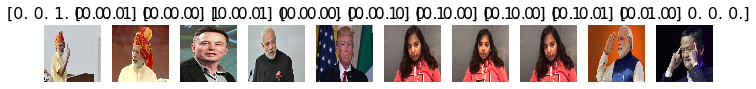

In [8]:
plot_img(imgs , titles=labels)

In [9]:
from tensorflow.keras import models,layers
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam


In [10]:
model = models.Sequential()

In [11]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))





model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [13]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(trian_generator,steps_per_epoch=4,epochs=100,callbacks=checkpoint,validation_data=valid_generator,validation_steps=4)


Epoch 1/100
4/4 [==============================] - 2s 432ms/step - loss: 42.5814 - accuracy: 0.1750 - val_loss: 12.7249 - val_accuracy: 0.1875
Epoch 2/100
4/4 [==============================] - 1s 320ms/step - loss: 22.7468 - accuracy: 0.3333 - val_loss: 18.0549 - val_accuracy: 0.1250
Epoch 3/100
4/4 [==============================] - 1s 332ms/step - loss: 15.5016 - accuracy: 0.1750 - val_loss: 11.5285 - val_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 1s 326ms/step - loss: 10.5640 - accuracy: 0.2500 - val_loss: 3.8454 - val_accuracy: 0.3125
Epoch 5/100
4/4 [==============================] - 1s 339ms/step - loss: 5.6123 - accuracy: 0.4000 - val_loss: 2.0669 - val_accuracy: 0.7500
Epoch 6/100
4/4 [==============================] - 1s 349ms/step - loss: 6.8340 - accuracy: 0.2750 - val_loss: 3.0993 - val_accuracy: 0.3125
Epoch 7/100
4/4 [==============================] - 1s 345ms/step - loss: 3.1991 - accuracy: 0.4250 - val_loss: 3.2279 - val_accuracy: 0.4375
Epoch 

Epoch 59/100
4/4 [==============================] - 1s 344ms/step - loss: 0.6555 - accuracy: 0.8750 - val_loss: 0.8592 - val_accuracy: 0.5625
Epoch 60/100
4/4 [==============================] - 1s 357ms/step - loss: 0.4961 - accuracy: 0.8750 - val_loss: 1.2408 - val_accuracy: 0.6250
Epoch 61/100
4/4 [==============================] - 1s 349ms/step - loss: 0.3999 - accuracy: 0.9000 - val_loss: 0.9705 - val_accuracy: 0.5625
Epoch 62/100
4/4 [==============================] - 1s 332ms/step - loss: 0.2809 - accuracy: 0.9250 - val_loss: 0.6752 - val_accuracy: 0.6875
Epoch 63/100
4/4 [==============================] - 1s 317ms/step - loss: 0.2764 - accuracy: 0.9000 - val_loss: 0.5580 - val_accuracy: 0.8750
Epoch 64/100
4/4 [==============================] - 1s 347ms/step - loss: 0.2626 - accuracy: 0.9000 - val_loss: 0.4169 - val_accuracy: 0.7500
Epoch 65/100
4/4 [==============================] - 1s 357ms/step - loss: 0.1678 - accuracy: 0.9250 - val_loss: 0.6687 - val_accuracy: 0.8125
Epoch 

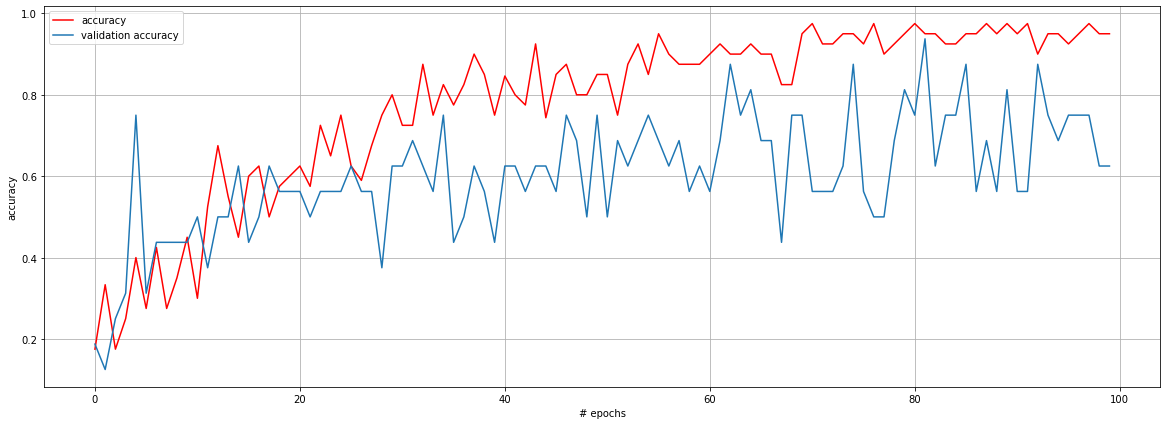

In [17]:
plt.figure(figsize=(20,7))

plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

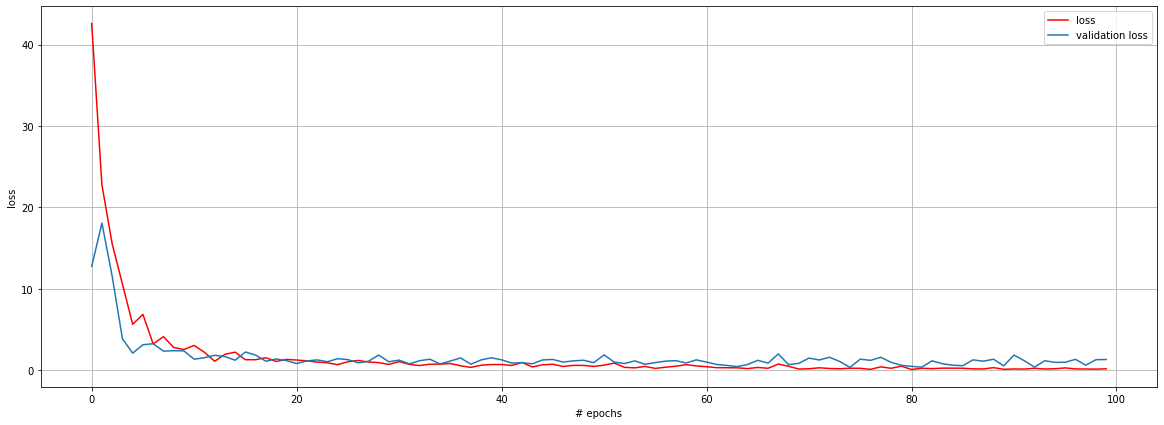

In [18]:
plt.figure(figsize=(20,7))

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()